#  Will I Like This Movie? - SOLUTIONS
##  Spoiler Alert! Try the workshop first!

This notebook contains the complete solutions. Only look here if you're stuck!

---

## Checkpoint 1:  Environment Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Make plots look nice
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Show plots inline
%matplotlib inline

print(" All libraries imported successfully!")
print(f" Pandas version: {pd.__version__}")
print(f" NumPy version: {np.__version__}")

 All libraries imported successfully!
 Pandas version: 2.2.2
 NumPy version: 2.0.2


## Checkpoint 2:  Load the Data

In [2]:
import kagglehub
import os

# Download the TMDB movie dataset from Kaggle
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")
print("Path to dataset files:", path)

# Join the path with the specific file name
file_path = os.path.join(path, "tmdb_5000_movies.csv")

# Load the dataset
df = pd.read_csv(file_path)

print(f" Loaded {len(df)} movies!")

Using Colab cache for faster access to the 'tmdb-movie-metadata' dataset.
Path to dataset files: /kaggle/input/tmdb-movie-metadata
 Loaded 4803 movies!


In [3]:
# Data preprocessing

# Function to extract the first/primary genre from the JSON list
def extract_first_genre(genres_str):
    try:
        genres_list = json.loads(genres_str)
        if genres_list:
            return genres_list[0]['name']
    except:
        pass
    return 'Unknown'

# Extract year from release_date
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Extract primary genre
df['genre'] = df['genres'].apply(extract_first_genre)

print(" Data preprocessing complete!")
print(f" Years range: {df['release_year'].min():.0f} - {df['release_year'].max():.0f}")
print(f" Genres found: {df['genre'].nunique()}")

 Data preprocessing complete!
 Years range: 1916 - 2017
 Genres found: 21


In [4]:
# SOLUTION: Display the first 5 rows of the dataset
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,genre
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,Action
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,Adventure
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0,Action
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0,Action
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0,Action


In [5]:
# SOLUTION: Check the shape of the dataset
df.shape

(4803, 22)

In [6]:
# SOLUTION: List all column names
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year', 'genre'],
      dtype='object')

## Checkpoint 3:  Explore the Data

In [7]:
# Get summary statistics
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4802.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,2002.468763
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,12.414354
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1916.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,1999.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,2005.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,2011.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000


In [8]:
# SOLUTION: Average movie rating
average_rating = df['vote_average'].mean()
print(f" Average movie rating: {average_rating:.2f}")

 Average movie rating: 6.09


In [9]:
# SOLUTION: Highest-rated movie
best_movie = df.loc[df['vote_average'].idxmax()]
print(f" Highest rated movie: {best_movie['title']} ({best_movie['vote_average']})")

 Highest rated movie: Stiff Upper Lips (10.0)


In [10]:
# SOLUTION: Lowest-rated movie
worst_movie = df.loc[df['vote_average'].idxmin()]
print(f" Lowest rated movie: {worst_movie['title']} ({worst_movie['vote_average']})")

 Lowest rated movie: Black Water Transit (0.0)


In [11]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
release_year               1
genre                      0
dtype: int64


## Checkpoint 4:  Visualize Patterns

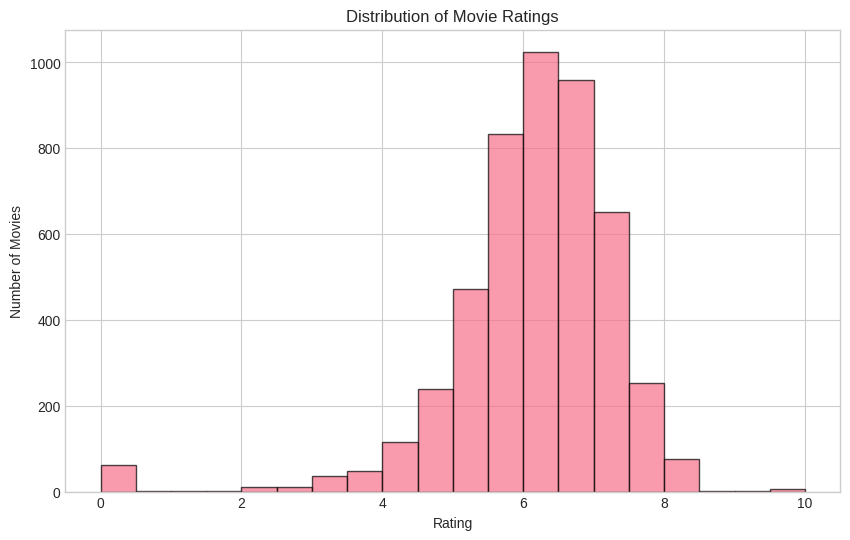

In [12]:
# SOLUTION: Histogram of movie ratings
plt.figure(figsize=(10, 6))
plt.hist(df['vote_average'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings')
plt.show()

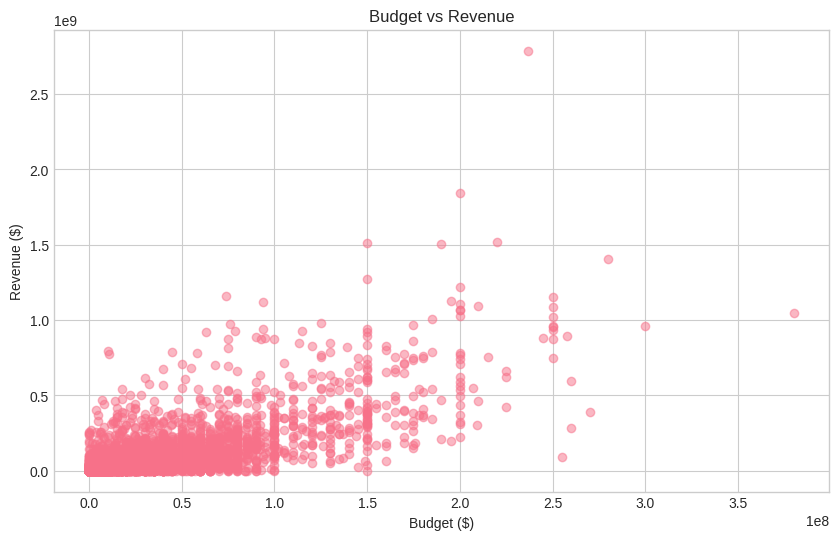

In [13]:
# SOLUTION: Scatter plot of budget vs revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.title('Budget vs Revenue')
plt.show()

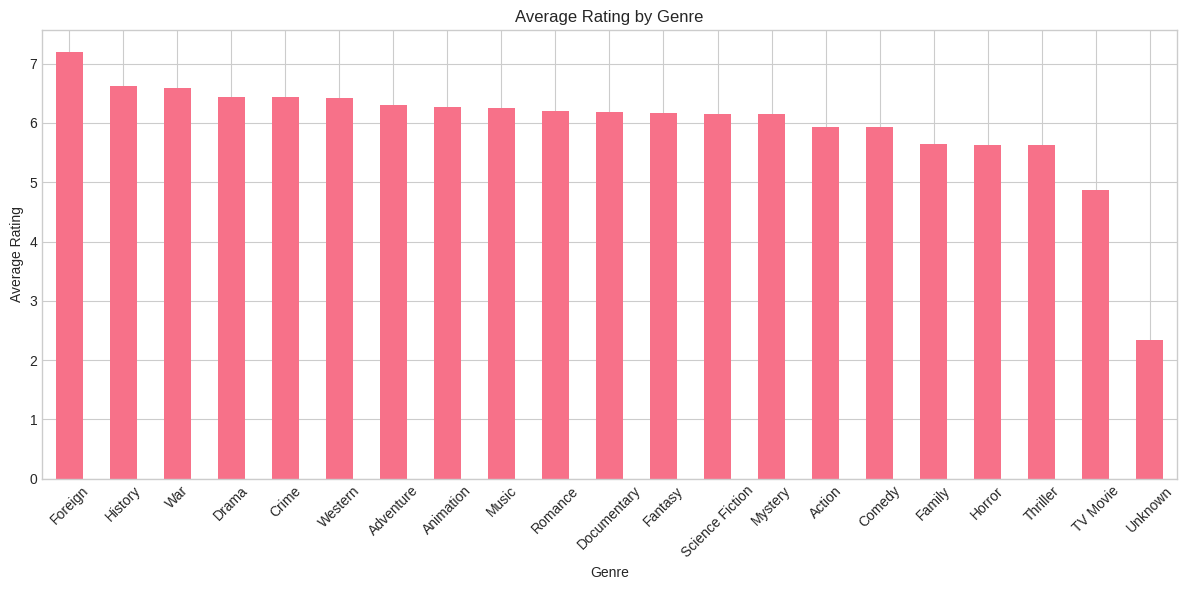

In [14]:
# SOLUTION: Bar chart of average rating by genre
plt.figure(figsize=(12, 6))
df.groupby('genre')['vote_average'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

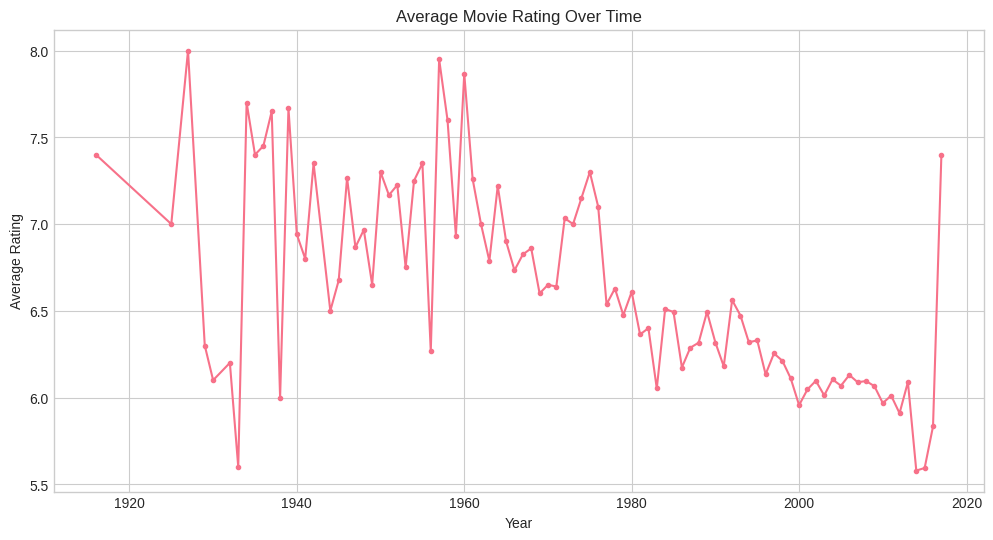

In [15]:
# Average rating per year
plt.figure(figsize=(12, 6))
yearly_avg = df.groupby('release_year')['vote_average'].mean()
yearly_avg.plot(kind='line', marker='o', markersize=3)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over Time')
plt.show()

## Checkpoint 5:  Find Correlations

In [16]:
# Select numeric columns for correlation
numeric_cols = ['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']
correlation_matrix = df[numeric_cols].corr()

# Display correlation with vote_average
print("Correlation with ratings (vote_average):")
print(correlation_matrix['vote_average'].sort_values(ascending=False))

Correlation with ratings (vote_average):
vote_average    1.000000
runtime         0.375046
vote_count      0.312997
popularity      0.273952
revenue         0.197150
budget          0.093146
Name: vote_average, dtype: float64


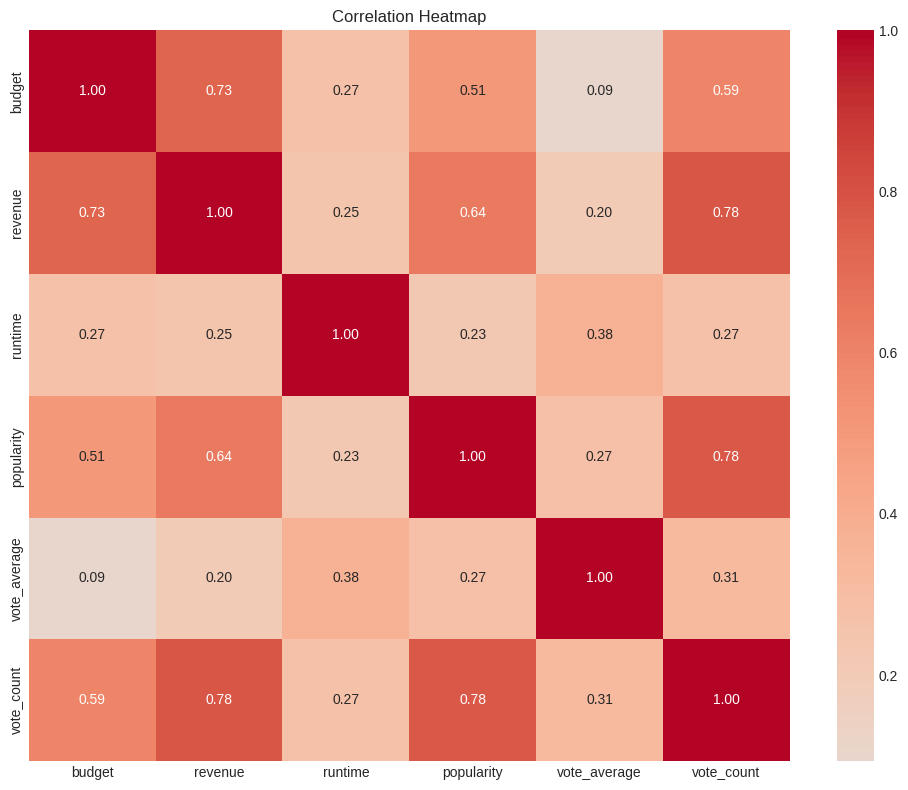

In [17]:
# SOLUTION: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Checkpoint 6:  Build a Simple Predictor

In [18]:
# Import machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print(" ML libraries imported!")

 ML libraries imported!


In [19]:
# Prepare the data
features = ['budget', 'runtime', 'popularity', 'vote_count']
target = 'vote_average'

# Remove rows with missing values
df_clean = df[features + [target]].dropna()

X = df_clean[features]
y = df_clean[target]

print(f" Using {len(X)} movies for training")
print(f" Features: {features}")
print(f" Target: {target}")

 Using 4801 movies for training
 Features: ['budget', 'runtime', 'popularity', 'vote_count']
 Target: vote_average


In [20]:
# SOLUTION: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f" Training set: {len(X_train)} movies")
print(f" Testing set: {len(X_test)} movies")

 Training set: 3840 movies
 Testing set: 961 movies


In [21]:
# SOLUTION: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

print(" Model trained!")

 Model trained!


In [22]:
# SOLUTION: Make predictions
y_pred = model.predict(X_test)

print(" Predictions made!")
print(f"\nFirst 5 predictions: {y_pred[:5]}")
print(f"Actual values:       {y_test[:5].values}")

 Predictions made!

First 5 predictions: [5.52879577 5.86375417 6.14288565 6.03464141 7.07947957]
Actual values:       [5.2 4.6 6.4 5.9 7.4]


## Checkpoint 7:  Evaluate Your Model

In [23]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(" Model Performance:")
print(f"   Root Mean Squared Error: {rmse:.2f}")
print(f"   R² Score: {r2:.3f}")
print(f"\n Interpretation:")
print(f"   On average, our predictions are off by {rmse:.2f} rating points")
print(f"   Our model explains {r2*100:.1f}% of the variance in ratings")

 Model Performance:
   Root Mean Squared Error: 1.04
   R² Score: 0.233

 Interpretation:
   On average, our predictions are off by 1.04 rating points
   Our model explains 23.3% of the variance in ratings


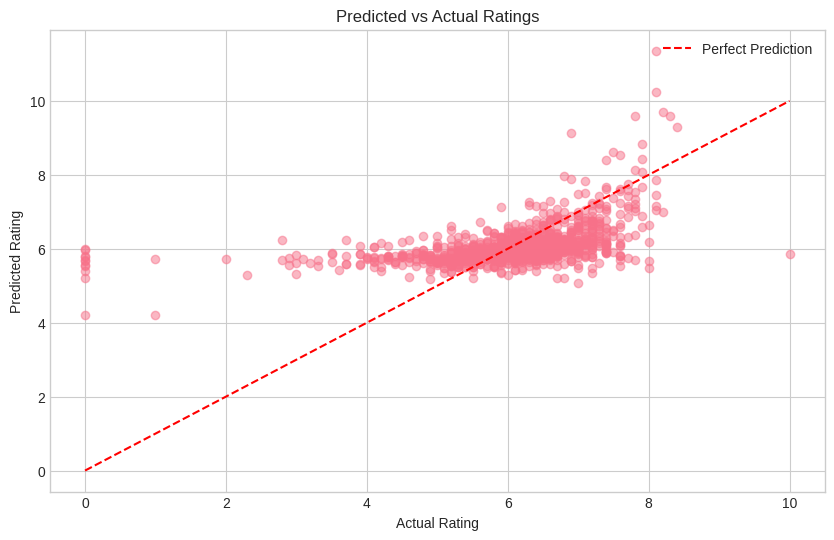

In [24]:
# SOLUTION: Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 10], [0, 10], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Predicted vs Actual Ratings')
plt.legend()
plt.show()

In [25]:
# Feature importance
feature_importance = pd.DataFrame({
'Feature': features,
'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(" Feature Importance:")
print(feature_importance)

 Feature Importance:
      Feature   Coefficient
1     runtime  1.694997e-02
2  popularity  2.941525e-03
3  vote_count  2.939674e-04
0      budget -6.262523e-09


##  Congratulations!

In [26]:
print("="*50)
print(" CONGRATULATIONS! ")
print("="*50)
print("\nYou've completed your first Data Science project!")
print("\nYou now know how to:")
print("   Load and explore datasets")
print("   Create insightful visualizations")
print("   Analyze correlations")
print("   Build and evaluate ML models")
print("\nWelcome to the world of Data Science & AI! ")

 CONGRATULATIONS! 

You've completed your first Data Science project!

You now know how to:
   Load and explore datasets
   Create insightful visualizations
   Analyze correlations
   Build and evaluate ML models

Welcome to the world of Data Science & AI! 
